## Zadanie domowe: "mój histogram"
Przetwarzanie obrazów cyfrowych

Autor: Patryk Ciepiela

In [236]:
# ładowanie bibliotek
from skimage import data, img_as_ubyte, exposure
import matplotlib.pyplot as plt
import numpy as np

In [237]:
# Tu można podstawić dowolny obrazek
im = data.moon()

In [238]:
def my_histogram(img):          # Funkcja generująca histogram:
    br_list = [0]*256           # tworzę 256-elementową tablicę przechowującą ilosć "pikseli" na obrazku o danej luminancji
                                # i wypełniam ją zerami
        
    if len(img.shape) > 2 :     # jeżeli funkcja dostanie kolorowy obrazek:
        channels = img.shape[2] # pobieram ilość kanałów "w obrazku"
    else:                       # w przeciwnym przypadku
        channels = 1            # zakładam, że obrazek jest w skali szarości (posiada tylko jeden kanał)
    
    img = img_as_ubyte(img)     # za pomocą wbudowanej w scikit funkcji zamieniam wartości luminancji na liczby całkowite 0-255
    
    for x in range(img.shape[0]):      
        for y in range(img.shape[1]):               # dla każdego punktu na obrazie
            for z in range(channels):               # ... oraz każdego kanału (jeżeli więcej niż jeden)
                if(channels > 1):                   #
                    curr_brightness = img[x][y][z]  #
                else:                               # pobieram wartość luminancji
                    curr_brightness = img[x][y]     #
                br_list[curr_brightness] += 1       # i zwiększam ilość "pikseli" o danej luminancji o 1 
    return br_list                                  # zwrócona "tablica" zawiera informację o ilości punktów o danej luminancji

# Funkcja pomocnicza - rysowanie histogramu (skopiowane z pliku udostępnionego na zajęciach)
def plot_histogram(x_axis, y_axis, title=""): 
    plt.bar(x_axis, y_axis)
    plt.xlim([min(x_axis)-10, max(x_axis)+10])
    plt.title(title)
    plt.grid()
    plt.show()
    

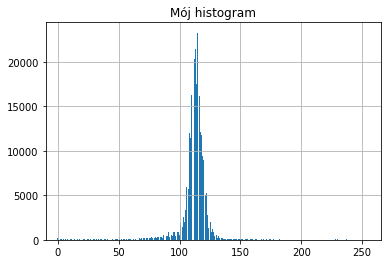

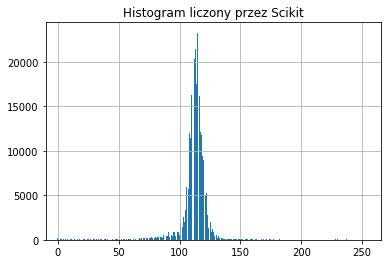

In [239]:
# Efekt końcowy
plot_histogram(range(256), my_histogram(im), "Mój histogram")

histogram = exposure.histogram(im, nbins=256)
hist, cbins = histogram
plot_histogram(cbins, hist, "Histogram liczony przez Scikit")